In [18]:
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
folder_name = ".\\data\\SK_histogram_full_noise"

# Load each numpy array from the folder
all_evals_ideal = np.load(os.path.join(folder_name, 'evals_ideal.npy'))
all_evals_mitigated = np.load(os.path.join(folder_name, 'evals_mitigated.npy'))
all_evals_noisy = np.load(os.path.join(folder_name, 'evals_noisy.npy'))
all_error_sums = np.load(os.path.join(folder_name, 'error_sums.npy'))

In [20]:
error_c1 = (np.array(all_evals_noisy).reshape(20, 100, 2, 12)[:, :, 0, :] -
            np.array(all_evals_ideal).reshape(20, 100, 1)).ravel()
error_c2 = (np.array(all_evals_noisy).reshape(20, 100, 2, 12)[:, :, 1, :] -
            np.array(all_evals_ideal).reshape(20, 100, 1)).ravel()
errors_mit = (np.array(all_evals_mitigated)- np.array(all_evals_ideal)).ravel()

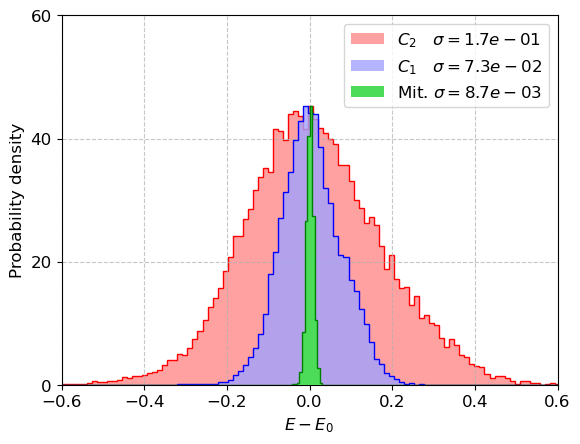

In [21]:
sns.reset_orig()
font = {'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)

plt.figure(figsize=(6, 4))

binwidth = 0.006
left_crop = 0.6

std_c1 = np.std(error_c1)
std_c2 = np.std(error_c2)
std_mit = np.std(errors_mit)

target_area_c1 = 5
target_area_c2 = 10

n_c1, bins_c1, _ = plt.hist(
    error_c1,
    bins=np.linspace(-left_crop, left_crop + binwidth, int(left_crop/binwidth)),
    density=True,
    zorder=1
)
plt.close()

n_c2, bins_c2, _ = plt.hist(
    error_c2,
    bins=np.linspace(-left_crop, left_crop + binwidth, int(left_crop/binwidth)),
    density=True,
    zorder=1
)
plt.close()

n_m, bins_m, _ = plt.hist(
    errors_mit,
    bins=np.linspace(-left_crop, left_crop + binwidth, 200),
    density=True,
    zorder=1
)
plt.close()

bin_width_c1 = np.diff(bins_c1)
actual_area_c1 = np.sum(n_c1 * bin_width_c1)
scaling_factor_c1 = target_area_c1 / actual_area_c1
scaling_factor_c1 = np.max(n_m) /np.max(n_c1)
scaled_n_c1 = n_c1 * scaling_factor_c1
plt.bar(bins_c1[:-1], scaled_n_c1, width=bin_width_c1, 
        align='edge', alpha=0.8, color='#a1a1ff', zorder=2, label=rf'$C_1$   $\sigma = {std_c1:.1e}$', edgecolor=None)


bin_width_c2 = np.diff(bins_c2)
actual_area_c2 = np.sum(n_c2 * bin_width_c2)
scaling_factor_c2 = target_area_c2 / actual_area_c2
scaling_factor_c2 = np.max(n_m) /np.max(n_c2)
scaled_n_c2 = n_c2 * scaling_factor_c2
plt.bar(bins_c2[:-1], scaled_n_c2, width=bin_width_c2, 
        align='edge', alpha=1, color='#ffa1a1', zorder=0, label=rf'$C_2$   $\sigma = {std_c2:.1e}$', edgecolor=None)

bin_width_m = np.diff(bins_m)
scaled_n_m = n_m
plt.bar(bins_m[:-1], scaled_n_m, width=bin_width_m, 
        align='edge', alpha=1, color='#4ddb5a', zorder=4, label=rf'Mit. $\sigma = {std_mit:.1e}$', fill=True, edgecolor=None)

plt.stairs(scaled_n_m, bins_m, color='g', zorder=5)
plt.stairs(scaled_n_c1, bins_c1, color='b', alpha=1, zorder=3)
plt.stairs(scaled_n_c2, bins_c2, color='r', alpha=1, zorder=1)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.ylabel('Probability density')
plt.xlabel('$E-E_0$')

handles, labels = plt.gca().get_legend_handles_labels()
handles[:2] = handles[1::-1]
labels[:2] = labels[1::-1]
plt.legend(handles, labels, loc='upper right')

plt.xlim(left=-left_crop, right=left_crop)
plt.yticks(np.linspace(0, 60, 4))
plt.show()